In [2]:
%matplotlib inline

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
from datetime import datetime as dt
from datetime import timedelta as td
from dateutil.relativedelta import relativedelta as rd

# NBER recessions
from pandas_datareader.data import DataReader


In [14]:
#pick a stock for the regime model based on users input ticker
#calculate intraday, overnight, and daily returns
def grabstock(symbol, years):
    end_date = dt.today().strftime('%Y-%m-%d')
    start_date = (dt.today() - td(days=years*365)).strftime('%Y-%m-%d')
    ticker = yf.Ticker(symbol)
    df = ticker.history(start=start_date, end=end_date)
    df['Intradayreturn'] = df.Close/df.Open-1
    overnightreturns = []
    df['overnight_return'] = (df.Open-df.Close)/df.Close
    df['daily_return'] = df['overnight_return'] + df['Intradayreturn']
   # log_returns = []
    #log_returns[0] = 0
    #for index, row in df.iloc[1:].iterrows():
       #if row['daily_return'] != 0:
        #    log_returns.append(np.log())
      #  else:
       #     log_returns.append(0)
    df['log_return'] = np.log(df['Close']/df['Close'].shift(1))
    df = df.dropna()
    #df['log_returns'] = log_returns
    return df

def regime(symbol):
    ticker = yf.Ticker(symbol)
    df = ticker.history(period = 'max')
    first_last = df.iloc[[0, -1]]
    start_per = first_last.iloc[:,0].index[0]
    end_per = first_last.iloc[:,0].index[1]
    our_rate = first_last['Close'].iloc[-1]/first_last['Close'].iloc[0]
    #grab the SPY information for the same period
    sp500 = yf.Ticker('^GSPC')
    df2 = sp500.history(period = 'max')
    sp_per = df2.loc[(df2.index == start_per) | (df2.index == end_per)]
    sp_rate = sp_per['Close'].iloc[-1]/sp_per['Close'].iloc[0]
    #determine if stock outpaces spy over the same period of time (beats SP500)
    if our_rate >= sp_rate:
        return 0.7, 0.3, our_rate, sp_rate #bull case probabilities, following bull, bear
    else:
        return 0.3, 0.7, our_rate, sp_rate #bear case probabilities

stock = grabstock('^GSPC', 4)
regim = regime('AAPL')
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Intradayreturn,overnight_return,daily_return,log_return
Date,,,,,,,,,,,
2019-12-03 00:00:00-05:00,3087.409912,3094.969971,3070.330078,3093.199951,3671580000,0.0,0.0,0.001875,-0.001872,3.510433e-06,-0.006660
2019-12-04 00:00:00-05:00,3103.500000,3119.379883,3102.530029,3112.760010,3702980000,0.0,0.0,0.002984,-0.002975,8.876168e-06,0.006304
2019-12-05 00:00:00-05:00,3119.209961,3119.449951,3103.760010,3117.429932,3360480000,0.0,0.0,-0.000571,0.000571,3.258464e-07,0.001499
2019-12-06 00:00:00-05:00,3134.620117,3150.600098,3134.620117,3145.909912,3483310000,0.0,0.0,0.003602,-0.003589,1.292531e-05,0.009094
2019-12-09 00:00:00-05:00,3141.860107,3148.870117,3135.459961,3135.959961,3400470000,0.0,0.0,-0.001878,0.001881,3.533200e-06,-0.003168
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-24 00:00:00-05:00,4555.839844,4560.310059,4552.799805,4559.339844,1639500000,0.0,0.0,0.000768,-0.000768,5.897469e-07,0.000597
2023-11-27 00:00:00-05:00,4554.859863,4560.520020,4546.319824,4550.430176,3403990000,0.0,0.0,-0.000973,0.000973,9.467138e-07,-0.001956
2023-11-28 00:00:00-05:00,4545.549805,4568.140137,4540.509766,4554.890137,3586240000,0.0,0.0,0.002055,-0.002051,4.213668e-06,0.000980


In [15]:
dta = stock
dta

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Intradayreturn,overnight_return,daily_return,log_return
Date,,,,,,,,,,,
2019-12-03 00:00:00-05:00,3087.409912,3094.969971,3070.330078,3093.199951,3671580000,0.0,0.0,0.001875,-0.001872,3.510433e-06,-0.006660
2019-12-04 00:00:00-05:00,3103.500000,3119.379883,3102.530029,3112.760010,3702980000,0.0,0.0,0.002984,-0.002975,8.876168e-06,0.006304
2019-12-05 00:00:00-05:00,3119.209961,3119.449951,3103.760010,3117.429932,3360480000,0.0,0.0,-0.000571,0.000571,3.258464e-07,0.001499
2019-12-06 00:00:00-05:00,3134.620117,3150.600098,3134.620117,3145.909912,3483310000,0.0,0.0,0.003602,-0.003589,1.292531e-05,0.009094
2019-12-09 00:00:00-05:00,3141.860107,3148.870117,3135.459961,3135.959961,3400470000,0.0,0.0,-0.001878,0.001881,3.533200e-06,-0.003168
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-24 00:00:00-05:00,4555.839844,4560.310059,4552.799805,4559.339844,1639500000,0.0,0.0,0.000768,-0.000768,5.897469e-07,0.000597
2023-11-27 00:00:00-05:00,4554.859863,4560.520020,4546.319824,4550.430176,3403990000,0.0,0.0,-0.000973,0.000973,9.467138e-07,-0.001956
2023-11-28 00:00:00-05:00,4545.549805,4568.140137,4540.509766,4554.890137,3586240000,0.0,0.0,0.002055,-0.002051,4.213668e-06,0.000980


c:\Users\stefa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


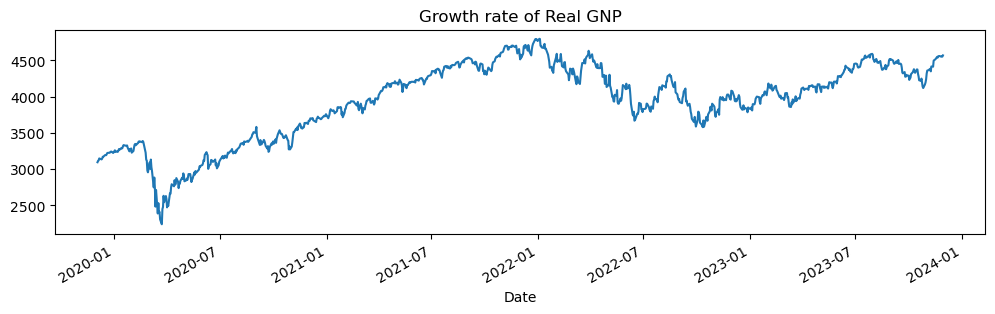

In [16]:
# Plot the data
ret = dta.Close
ret.plot(title="Closing S&P 500", figsize=(12, 3))

# Fit the model
mod_hamilton = sm.tsa.MarkovRegression(ret, k_regimes=2)
res_hamilton = mod_hamilton.fit()

In [17]:
res_hamilton.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1006
Model:               MarkovRegression   Log Likelihood               -7117.236
Date:                Fri, 01 Dec 2023   AIC                          14244.471
Time:                        12:04:40   BIC                          14269.040
Sample:                             0   HQIC                         14253.807
                               - 1006                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3243.5331     18.637    174.040      0.000    3207.006    3280.060
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4219.5335     11.165    377.938      0.000    4197.651    4241.416
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.945e+04   3551.516     22.372      0.000    7.25e+04    8.64e+04
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9954      0.004    268.275      0.000       0.988       1.003
p[1->0]        0.0023      0.002      1.362      0.173      -0.001       0.006
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

# What we can Understand from the above:

We are given two constants, in Regime Switching model regarding stock price, <br>
the most basic example is a bull regime and a bear regime:<br>

Regime 0 corresponds to the 'low' regime according to statsmodel.api references which is our bear scenario, <br>
while Regime 1 corresponds to the 'high' regime which is our bull scenario

With a mean of approx. $3243 for the market value of the S and P 500, we can assume that this is the mean of a bear market<br>
on the contrary with a mean of approx. $4218 we can say this is the mean of a bull market<br>


<Axes: title={'center': 'Probability of being in the Bull regime S&P 500'}, xlabel='Date'>

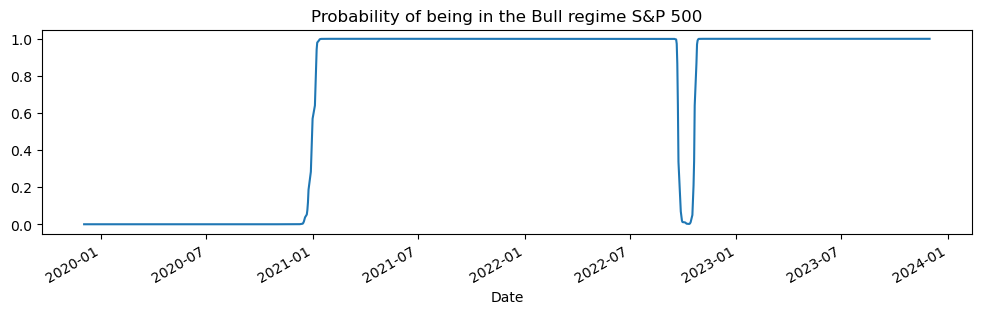

In [18]:
res_hamilton.smoothed_marginal_probabilities[1].plot(
    title="Probability of being in the Bull regime S&P 500", figsize=(12, 3)
)

### We can see that the bull periods matches what we know as the markets bull periods 

In [19]:
res_hamilton.expected_durations

array([217.53074299, 429.33606756])

##### The expected durations above returns how long we are in a bear market and bull market, respectively

We obtain this by dividing each by the number of days in a month resulting in : <br>
Approx 2 Years Bear<br>
Approx 2 Years Bull

### Changes using 3 regimes: 

Bear, Stagnant, Bull<br>


Notes:<br>
Poor visualization for market, <br>
ie market is rarely stagnant, so 3 regimes is a poor visualization

In [21]:
ret2 = dta.Close
#exog = pd.concat((dta.shift(), dta_ogap, dta_inf), axis=1).iloc[4:]
# Fit the model
mod_3 = sm.tsa.MarkovRegression(ret2, k_regimes=3)
res_3 = mod_3.fit(search_reps=20)
#print(res_3.summary())
#print(res_3.expected_durations)

c:\Users\stefa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\stefa\anaconda3\Lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1291: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
c:\Users\stefa\anaconda3\Lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1291: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'


In [22]:
res_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1006
Model:               MarkovRegression   Log Likelihood               -7117.236
Date:                Fri, 01 Dec 2023   AIC                          14254.472
Time:                        12:06:06   BIC                          14303.609
Sample:                             0   HQIC                         14273.142
                               - 1006                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3216.3664      0.124    2.6e+04      0.000    3216.124    3216.609
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3243.5063     18.633    174.070      0.000    3206.986    3280.027
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4219.5006     11.162    378.018      0.000    4197.623    4241.378
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.942e+04      0.001   5.92e+07      0.000    7.94e+04    7.94e+04
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.0004     54.618   7.64e-06      1.000    -107.048     107.049
p[1->0]             0        nan        nan        nan         nan         nan
p[2->0]     1.144e-10   3.52e-05   3.25e-06      1.000   -6.91e-05    6.91e-05
p[0->1]        0.9996     43.725      0.023      0.982     -84.700      86.699
p[1->1]        0.9954      0.004    268.234      0.000       0.988       1.003
p[2->1]        0.0023      0.002      1.361      0.173      -0.001       0.006
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 3.81e+25. Standard errors may be unstable.
"""

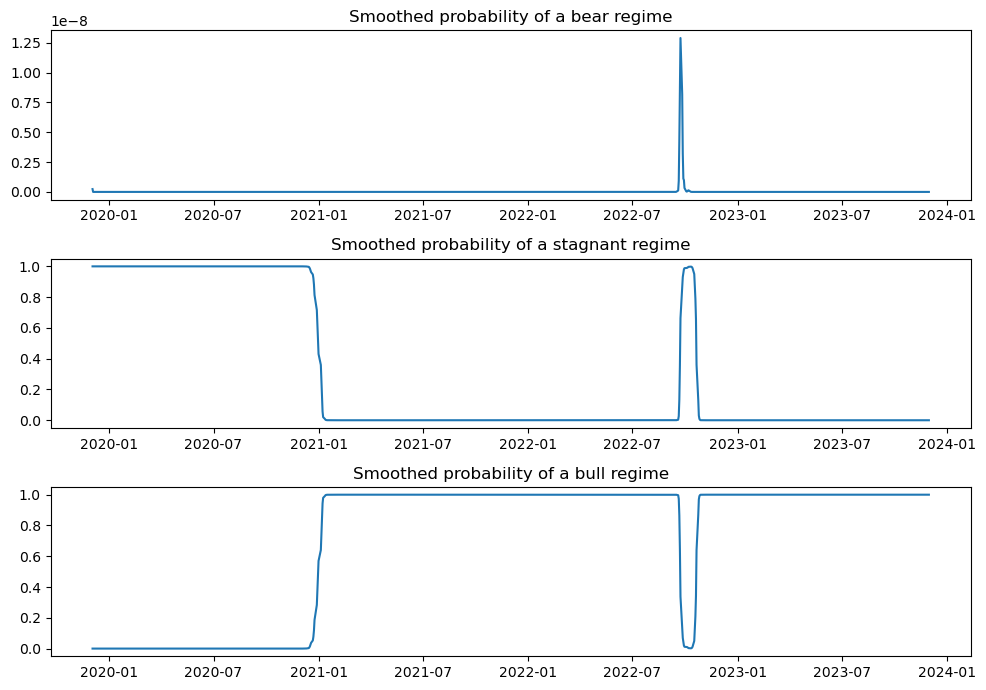

In [23]:
fig, axes = plt.subplots(3, figsize=(10, 7))

ax = axes[0]
ax.plot(res_3.smoothed_marginal_probabilities[0])
ax.set(title="Smoothed probability of a bear regime")

ax = axes[1]
ax.plot(res_3.smoothed_marginal_probabilities[1])
ax.set(title="Smoothed probability of a stagnant regime")

ax = axes[2]
ax.plot(res_3.smoothed_marginal_probabilities[2])
ax.set(title="Smoothed probability of a bull regime")

fig.tight_layout()

## Further steps: comparison to the other stocks vs market:

PEP, AAPL, GME <br>
We want to look at some cyclical stocks

In [57]:
#We use the same period as for S&P500 above: 4 years

pep = grabstock('PEP', 4)
aapl = grabstock('AAPL', 4)
gme = grabstock('GME', 4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Intradayreturn,overnight_return,daily_return,log_return
Date,,,,,,,,,,,
2019-12-03 00:00:00-05:00,121.302410,121.302410,119.225378,120.237267,5000000,0.000,0.0,-0.008781,0.008859,7.778713e-05,-0.003096
2019-12-04 00:00:00-05:00,119.784574,121.932618,119.420646,121.870491,4228200,0.000,0.0,0.017414,-0.017116,2.980537e-04,0.013492
2019-12-05 00:00:00-05:00,121.731957,122.044793,120.909627,121.866028,3351800,0.955,0.0,0.001101,-0.001100,1.211654e-06,-0.000037
2019-12-06 00:00:00-05:00,122.160982,123.072701,121.866013,122.777733,3216900,0.000,0.0,0.005049,-0.005023,2.536108e-05,0.007453
2019-12-09 00:00:00-05:00,122.590037,123.385553,122.455966,122.598984,3882900,0.000,0.0,0.000073,-0.000073,5.326287e-09,-0.001457
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-24 00:00:00-05:00,167.671452,168.733362,167.671452,168.088272,1751700,0.000,0.0,0.002486,-0.002480,6.164532e-06,0.000886
2023-11-27 00:00:00-05:00,168.415781,168.415781,166.817964,167.046234,3664700,0.000,0.0,-0.008132,0.008199,6.667055e-05,-0.006219
2023-11-28 00:00:00-05:00,167.105775,168.475321,166.748498,167.582138,4056100,0.000,0.0,0.002851,-0.002843,8.103216e-06,0.003203


In [25]:
pep_close = pep.Close
aapl_close = aapl.Close
gme_close = gme.Close

# Fit the models
mod_pep = sm.tsa.MarkovRegression(pep_close, k_regimes=2)
res_pep = mod_pep.fit()

mod_aapl = sm.tsa.MarkovRegression(aapl_close, k_regimes=2)
res_aapl = mod_aapl.fit()

mod_gme = sm.tsa.MarkovRegression(gme_close, k_regimes=2)
res_gme = mod_gme.fit()

c:\Users\stefa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\stefa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\stefa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [27]:
res_pep.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1006
Model:               MarkovRegression   Log Likelihood               -4535.529
Date:                Fri, 01 Dec 2023   AIC                           9081.058
Time:                        12:13:39   BIC                           9105.627
Sample:                             0   HQIC                          9090.393
                               - 1006                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.1413   4329.554      0.031      0.976   -8353.629    8617.911
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        149.7298      0.693    216.188      0.000     148.372     151.087
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       482.5473     21.516     22.428      0.000     440.377     524.717
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.0227     13.859      0.002      0.999     -27.140      27.185
p[1->0]      7.72e-07      0.000      0.002      0.998      -0.001       0.001
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [28]:
res_aapl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1006
Model:               MarkovRegression   Log Likelihood               -4440.903
Date:                Fri, 01 Dec 2023   AIC                           8891.806
Time:                        12:13:44   BIC                           8916.375
Sample:                             0   HQIC                          8901.142
                               - 1006                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.4160      1.482     60.327      0.000      86.511      92.321
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.2256      0.784    195.430      0.000     151.689     154.762
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       395.0681     17.638     22.399      0.000     360.499     429.637
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9984      0.002    456.934      0.000       0.994       1.003
p[1->0]        0.0009      0.001      0.861      0.389      -0.001       0.003
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [29]:
res_gme.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1006
Model:               MarkovRegression   Log Likelihood               -3763.268
Date:                Fri, 01 Dec 2023   AIC                           7536.537
Time:                        12:13:49   BIC                           7561.106
Sample:                             0   HQIC                          7545.872
                               - 1006                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2723      0.436     23.541      0.000       9.417      11.127
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.2738      0.483     79.281      0.000      37.328      39.220
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        99.6654      4.456     22.369      0.000      90.933     108.398
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9969      0.002    443.333      0.000       0.993       1.001
p[1->0]        0.0053      0.003      1.603      0.109      -0.001       0.012
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

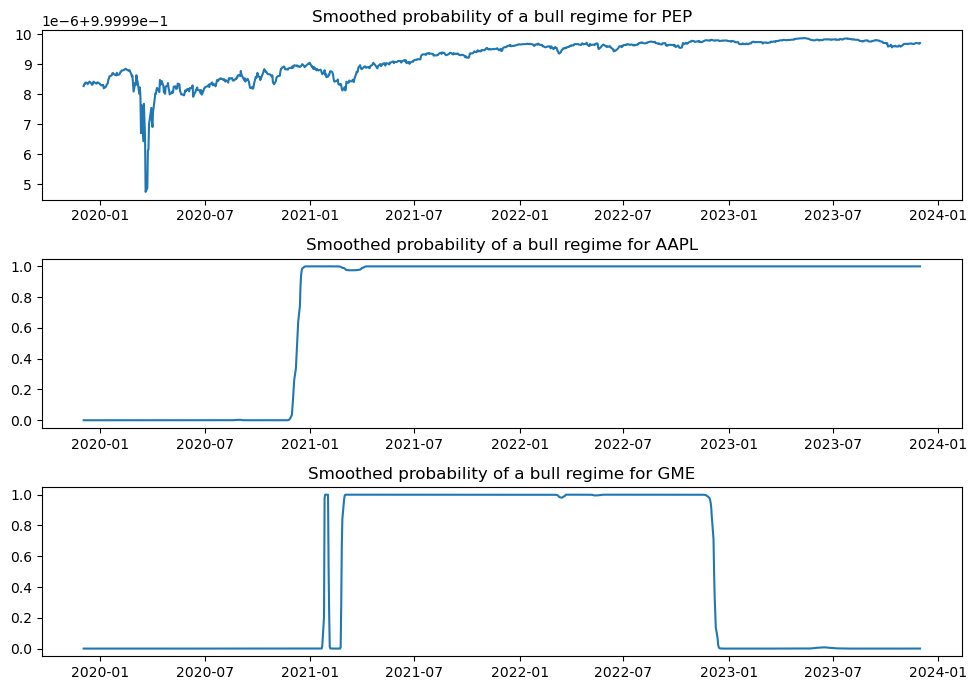

In [31]:
fig, axes = plt.subplots(3, figsize=(10, 7))

ax = axes[0]
ax.plot(res_pep.smoothed_marginal_probabilities[1])
ax.set(title="Smoothed probability of a bull regime for PEP")

ax = axes[1]
ax.plot(res_aapl.smoothed_marginal_probabilities[1])
ax.set(title="Smoothed probability of a bull regime for AAPL")

ax = axes[2]
ax.plot(res_gme.smoothed_marginal_probabilities[1])
ax.set(title="Smoothed probability of a bull regime for GME")

fig.tight_layout()

In [58]:
#Here we form markov regressions on each of the 3 stocks based on their returns
#We use the parameters as inputs for simulating the stock paths
pep_logret = pep.log_return
aapl_logret = aapl.log_return
gme_logret = gme.log_return

# Fit the models
mod_pep = sm.tsa.MarkovRegression(pep_logret, k_regimes=2)
res_pep = mod_pep.fit()

mod_aapl = sm.tsa.MarkovRegression(aapl_logret, k_regimes=2)
res_aapl = mod_aapl.fit()

mod_gme = sm.tsa.MarkovRegression(gme_logret, k_regimes=2)
res_gme = mod_gme.fit()

res_pep.params #shows calculated transition probabilities, mean, and overall var

c:\Users\stefa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\stefa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\stefa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


p[0->0]     0.499945
p[1->0]     0.499959
const[0]    0.000314
const[1]    0.000349
sigma2      0.000214
dtype: float64

### Simulating stock values using calculated transition probabilities and mean and volatility of each regime

In [59]:
# Initial state
current_state = "bull"
num_sims = 100
initial_price = 100
num_days = 252
simulated_prices = np.zeros((num_sims, num_days))

def simulate(num_sims, initial_price, num_days, mu_bull, mu_bear, vol_bull, vol_bear, p_bear_to_bear, p_bull_to_bear):
    for i in range(num_sims):
        current_state = "bull"
        daily_returns = np.zeros(num_days)
        for day in range(num_days):
            if current_state == "bull":
                return_bull = np.random.normal(mu_bull, vol_bull)
                daily_returns[day] = return_bull

                if np.random.rand() > p_bull_to_bear:
                    current_state = "bear"
            else:
                return_bear = np.random.normal(mu_bear, vol_bear)
                daily_returns[day] = return_bear

                if np.random.rand() > p_bear_to_bear:
                    current_state = "bull"
        simulated_prices[i] = initial_price * np.cumprod(1 + daily_returns)
    return simulated_prices

In [60]:
num_stocks = 3

mu_bull = [0]*num_stocks
mu_bear = [0]*num_stocks
vol_bull = [0]*num_stocks
vol_bear = [0]*num_stocks
p_bear_to_bear = [0]*num_stocks
p_bull_to_bear = [0]*num_stocks
for i in range(num_stocks):
    if i == 0:
        p_bear_to_bear[i] = res_pep.params[0]
        p_bull_to_bear[i] = res_pep.params[1]
        mu_bear[i] = res_pep.params[2]
        mu_bull[i] = res_pep.params[3]
        vol_bull[i] = np.sqrt(res_pep.params[4])+np.sqrt(res_pep.params[4])/2
        vol_bear[i] = np.sqrt(res_pep.params[4])-np.sqrt(res_pep.params[4])/2
        sim_pep = simulate(num_sims, initial_price, num_days, mu_bull[i], mu_bear[i], vol_bull[i], vol_bear[i], p_bear_to_bear[i], p_bull_to_bear[i])
    if i == 1:
        p_bear_to_bear[i] = res_aapl.params[0]
        p_bull_to_bear[i] = res_aapl.params[1]
        mu_bear[i] = res_aapl.params[2]
        mu_bull[i] = res_aapl.params[3]
        vol_bull[i] = np.sqrt(res_aapl.params[4])+np.sqrt(res_aapl.params[4])/2
        vol_bear[i] = np.sqrt(res_aapl.params[4])-np.sqrt(res_aapl.params[4])/2
        sim_aapl =  simulate(num_sims, initial_price, num_days, mu_bull[i], mu_bear[i], vol_bull[i], vol_bear[i], p_bear_to_bear[i], p_bull_to_bear[i])

    if i == 2:
        p_bear_to_bear[i] = res_gme.params[0]
        p_bull_to_bear[i] = res_gme.params[1]
        mu_bear[i] = res_gme.params[2]
        mu_bull[i] = res_gme.params[3]
        vol_bull[i] = np.sqrt(res_gme.params[4])+np.sqrt(res_gme.params[4])/2
        vol_bear[i] = np.sqrt(res_gme.params[4])-np.sqrt(res_gme.params[4])/2
        sim_gme =  simulate(num_sims, initial_price, num_days, mu_bull[i], mu_bear[i], vol_bull[i], vol_bear[i], p_bear_to_bear[i], p_bull_to_bear[i])
        





In [61]:
#np.cumprod(1 + daily_returns) 
sim_gme

array([[110.70320454, 112.5115814 , 117.28188458, ...,  82.13906145,
         85.71940028,  82.3846722 ],
       [ 88.87910293,  72.99385946,  76.4692622 , ..., 293.15784577,
        325.42872765, 359.64117956],
       [ 96.27480463, 110.7859215 , 117.7252122 , ...,  55.3011132 ,
         52.50669262,  53.02776834],
       ...,
       [111.30232652, 119.508947  ,  98.00081464, ...,  69.50452886,
         62.60117976,  65.91963339],
       [ 98.38103521, 111.42106212, 125.44461717, ...,  97.89979157,
         91.05265737,  80.29574453],
       [ 87.02742642,  89.04172357,  93.43991953, ...,  15.1767283 ,
         11.76989456,  10.96086523]])

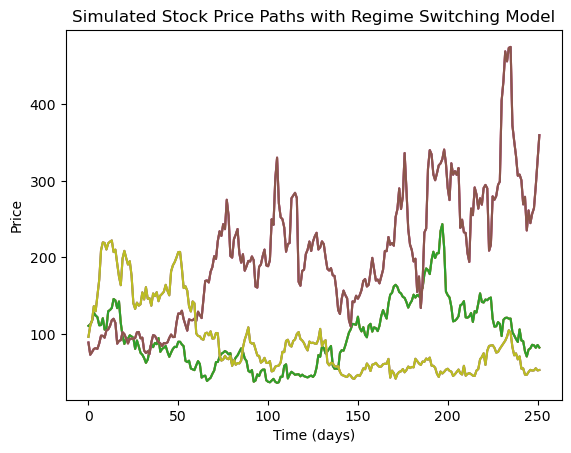

In [62]:
for i in range(num_stocks):
    plt.plot(sim_pep[i])
    plt.plot(sim_aapl[i])
    plt.plot(sim_gme[i])

plt.title("Simulated Stock Price Paths with Regime Switching Model")
plt.xlabel("Time (days)")
plt.ylabel("Price")
plt.show()

## The links for statsmodels.api:
https://www.statsmodels.org/dev/examples/notebooks/generated/markov_regression.html

https://www.statsmodels.org/stable/examples/notebooks/generated/markov_autoregression.html